In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in review and business data

rv = pd.read_csv('reviews_madison.csv', parse_dates=['date'])
bs = pd.read_csv('business_madison_with_groups.csv')

In [3]:
# Add year and count fields to review data

rv['year'] = pd.DatetimeIndex(rv['date']).year
rv['count'] = 1

In [4]:
# Merge review and business data on business ID

rv_bs = pd.merge(rv, bs, how='inner', on=None, left_on='business_id', right_on='business_id',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)


In [5]:
# Plot Formatting

def format_plot(x_title, y_title, title):
    plt.style.use('ggplot')
    plt.rcParams['axes.facecolor']='white'
    plt.rc('grid', color='#ECECEC', linestyle='solid')
    plt.yticks(color='#626F78', fontweight='bold', fontsize='14', horizontalalignment='center')
    plt.xlabel(x_title, labelpad = 20, fontweight='bold', color = '#626F78', fontsize='17', horizontalalignment='center')
    plt.ylabel(y_title, labelpad = 20, fontweight='bold', color = '#626F78', fontsize='17', horizontalalignment='center')
    plt.title(title, color = "#626F78", loc='center', horizontalalignment='center', fontsize = '20', y= 1.05, fontweight='bold',verticalalignment='center')
    plt.xticks(color='#626F78', rotation=0, fontweight='bold', fontsize='14')

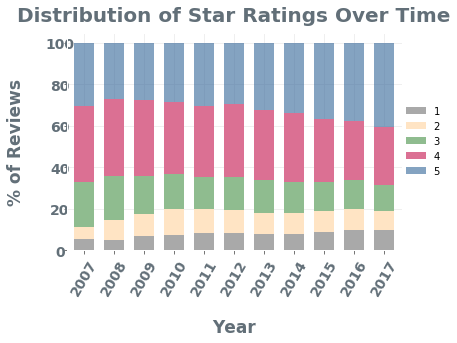

In [8]:
# Star Rating Distribution Plot

df = rv_bs[rv_bs.year > 2006]

rv_bs_yrs_stars = df.groupby(['year', 'stars_x']).sum()
rv_bs_yrs = df.groupby(['year']).sum()
rv_bs_yrs_stars_stk = rv_bs_yrs_stars.div(rv_bs_yrs) * 100


st = rv_bs_yrs_stars_stk[['count']].unstack().plot(kind='bar', stacked=True, width=0.65, color=['darkgray',  'bisque', 'darkseagreen', 'palevioletred', (0.2, 0.4, 0.6, 0.6)])

format_plot('Year', '% of Reviews', 'Distribution of Star Ratings Over Time')
plt.xticks(rotation=60)
plt.legend(('1','2', '3', '4', '5'),loc='center left', bbox_to_anchor= (1.0, 0.5), ncol=1, borderaxespad=0, frameon=False)



(3, 4)

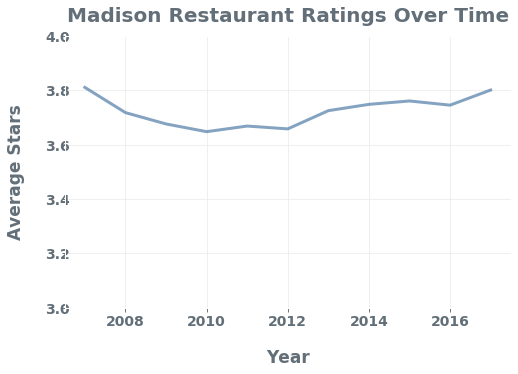

In [9]:
# Average Stars Plot

avg_stars = rv_bs[rv_bs.year > 2006][['stars_x', 'year']].groupby('year').mean()


avg_stars.columns = ['Average Stars']
avg_stars = avg_stars.reset_index()

fig, ax = plt.subplots(1,1, sharex = True, figsize=(8,5))
ax.plot(avg_stars.year, avg_stars['Average Stars'], color = (0.2, 0.4, 0.6, 0.6), linewidth=3)


format_plot('Year', 'Average Stars', 'Madison Restaurant Ratings Over Time')
plt.ylim((3,4))


/Users/jaclynandrews/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


count                    
zip_area between lakes northeast southwest
year                                      
2007               197        37        67
2008               343       101       145
2009               547       182       256
2010               816       314       374
2011              1105       402       548
2012              1357       492       788
2013              1806       702      1100
2014              2491      1048      1660
2015              3142      1223      1803
2016              3070      1162      1836
2017              2944      1200      1882

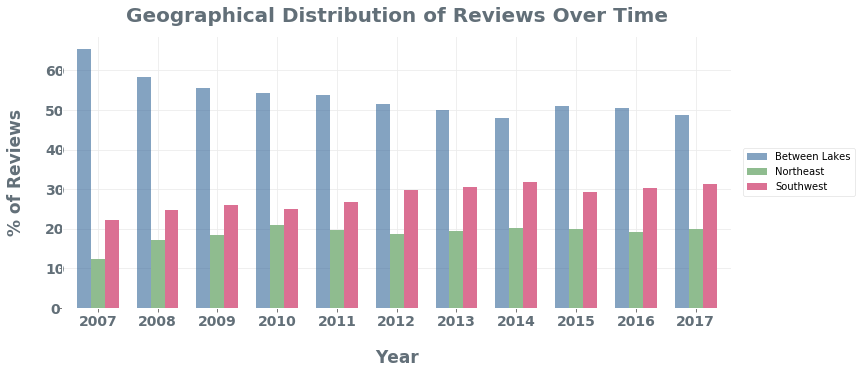

In [10]:
# Region Plot

df = rv_bs[rv_bs.cuisine_grp=='american'][rv_bs.year > 2006][rv_bs.zip_area!='other'][rv_bs.zip_area!='unknown']

rv_bs_yrs_area = df.groupby(['year', 'zip_area']).sum()[['count']]
rv_bs_yrs = df.groupby(['year']).sum()[['count']]
rv_bs_yrs_area_stk = rv_bs_yrs_area.div(rv_bs_yrs) * 100


st = rv_bs_yrs_area_stk[['count']].unstack().plot(figsize = (12,5), kind='bar', width = 0.7, color=[(0.2, 0.4, 0.6, 0.6), 'darkseagreen','palevioletred'])


format_plot('Year', '% of Reviews', 'Geographical Distribution of Reviews Over Time')
st.legend(['Between Lakes', 'Northeast', 'Southwest'], bbox_to_anchor=(1.01, 0.5), loc = "center left")


rv_bs_yrs_area[['count']].unstack()

count                                    
cuisine_grp american asian european latin american other
year                                                    
2007             301   111       61             36    41
2008             589   205       68             81    75
2009             989   401      169            176   107
2010            1506   505      214            309   128
2011            2063   715      241            330    98
2012            2639   845      360            409   145
2013            3608  1199      512            520   190
2014            5199  1692      687            745   298
2015            6168  1790      889            848   341
2016            6068  2180      881            949   396
2017            6026  2148      755           1109   380

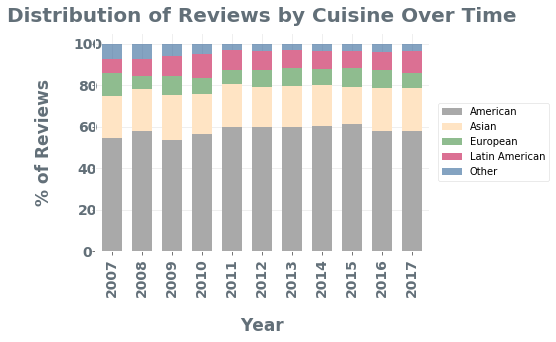

In [11]:
# Cuisine Plot

df = rv_bs[rv_bs.year > 2006]

rv_bs_yrs_csn = df.groupby(['year', 'cuisine_grp']).sum()[['count']]
rv_bs_yrs = df.groupby(['year']).sum()[['count']]
rv_bs_yrs_csn_stk = rv_bs_yrs_csn.div(rv_bs_yrs) * 100
rv_bs_yrs_csn_stk



st = rv_bs_yrs_csn_stk[['count']].unstack().plot(kind='bar', stacked=True, width = 0.65, color=['darkgray',  'bisque', 'darkseagreen', 'palevioletred', (0.2, 0.4, 0.6, 0.6)])

format_plot('Year', '% of Reviews', 'Distribution of Reviews by Cuisine Over Time')
plt.xticks(rotation=90)
st.legend(['American', 'Asian', 'European', 'Latin American', 'Other'], bbox_to_anchor=(1.01, 0.5), loc = "center left")

rv_bs_yrs_csn[['count']].unstack()

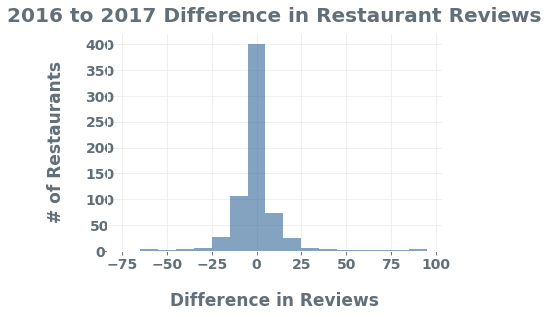

In [12]:
# Difference in Reviews Between 2016 and 2017

rv_2016 = rv_bs[rv_bs.year==2016][['count', 'business_id', 'name', 'cuisine_grp']].groupby(['name', 'cuisine_grp']).sum()
rv_2017 = rv_bs[rv_bs.year==2017][['count', 'business_id', 'name', 'cuisine_grp']].groupby(['name', 'cuisine_grp']).sum()

rv_16_17 = pd.merge(rv_2016, rv_2017, how='outer', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True,
         suffixes=('_2016', '_2017'), copy=True, indicator=False,
         validate=None)

rv_16_17 = rv_16_17.fillna(0)
rv_16_17['dif_16_17'] = rv_16_17.count_2017 - rv_16_17.count_2016

rv_16_17.dif_16_17.hist(bins = np.arange(-75,100, 10), color=(0.2, 0.4, 0.6, 0.6))

format_plot('Difference in Reviews', '# of Restaurants', '2016 to 2017 Difference in Restaurant Reviews')

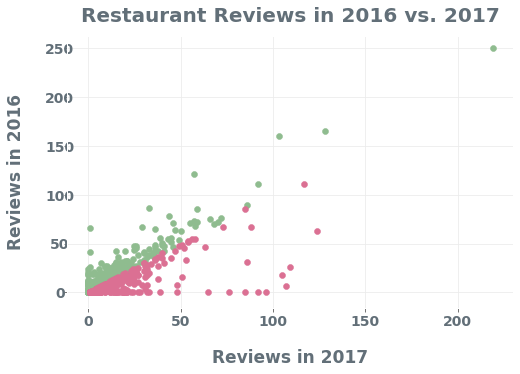

In [14]:
# 2016 vs 2017 Reviews Scatterplot

fig, ax = plt.subplots(1,1, sharex = True, figsize=(8,5))
ax.scatter(rv_16_17[rv_16_17.dif_16_17<0].count_2017, rv_16_17[rv_16_17.dif_16_17<0].count_2016, color = 'darkseagreen')
ax.scatter(rv_16_17[rv_16_17.dif_16_17>=0].count_2017, rv_16_17[rv_16_17.dif_16_17>=0].count_2016, color='palevioletred')

format_plot('Reviews in 2017', 'Reviews in 2016', 'Restaurant Reviews in 2016 vs. 2017')

In [15]:
# Restaurants that Opened in 2017
opened2017 = rv_16_17[rv_16_17.count_2016 == 0 ][rv_16_17.dif_16_17  > 10 ].sort_values(by='cuisine_grp')


# Restaurants that Closed in 2017
closed17 = rv_16_17[rv_16_17.count_2017 == 0 ][rv_16_17.dif_16_17  < -10 ].sort_values(by='cuisine_grp')

/Users/jaclynandrews/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jaclynandrews/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,name_2016,name_opened
cuisine_grp,,
american,60.690789,40.000000
asian,19.243421,23.333333
european,6.085526,13.333333
latin american,8.388158,20.000000
other,5.592105,3.333333


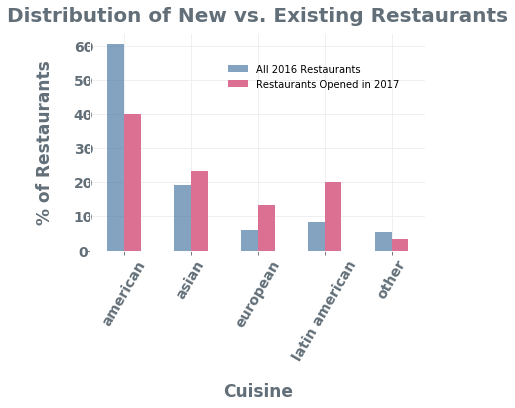

In [17]:
o17_dist = opened2017.reset_index()
o17_dist = o17_dist[['name', 'cuisine_grp']].groupby('cuisine_grp').count()
o17_dist = o17_dist.divide(o17_dist.name.sum()) * 100



rv16_dist = rv_2016.reset_index()
rv16_dist = rv16_dist[['name', 'cuisine_grp']].groupby('cuisine_grp').count()
rv16_dist = rv16_dist.divide(rv16_dist.name.sum()) *100

b = pd.merge(rv16_dist, o17_dist, how='outer', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True,
         suffixes=('_2016', '_opened'), copy=True, indicator=False,
         validate=None)

b.plot(kind='bar', color=[(0.2, 0.4, 0.6, 0.6), 'palevioletred'])


format_plot("Cuisine", "% of Restaurants", "Distribution of New vs. Existing Restaurants")
plt.xticks(rotation=60)
plt.legend(('All 2016 Restaurants','Restaurants Opened in 2017'),loc='center left', bbox_to_anchor= (0.4, 0.8), ncol=1, borderaxespad=0, frameon=False)

b

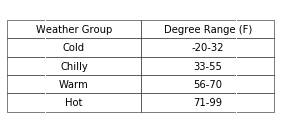

In [18]:
# Temperature Bucket Table creation for report

temp = np.array([['Cold', '-20-32'], ['Chilly', '33-55'], ['Warm', '56-70'], ['Hot', '71-99']])

fig, ax = plt.subplots(figsize=(3, 2))

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

collabel=("Weather Group", "Degree Range (F)",)
t = ax.table(cellText=temp,colLabels=collabel, loc='center', cellLoc='center', edges="BRLT", fontsize=30)

t.scale(1.4,1.4)
fig.tight_layout()


,useful,funny,cool,count,pct_useful,pct_funny,pct_cool
stars_x,,,,,,,
1,8776,3635,1049,5134,170.938839,70.802493,20.432411
2,9071,3114,1432,6064,149.587731,51.352243,23.614776
3,10261,3147,2928,8926,114.956307,35.256554,32.803047
4,20761,5829,10699,18877,109.980399,30.878847,56.677438
5,22528,5806,12929,20928,107.645260,27.742737,61.778479


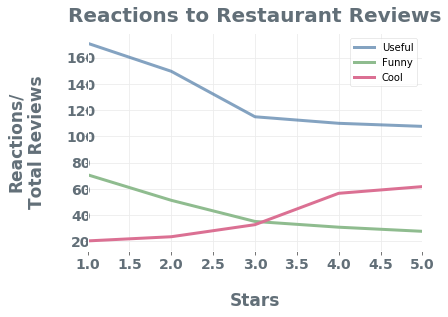

In [20]:
# Which reviews did users find useful? funny? cool?

by_stars = rv_bs.groupby('stars_x').sum()
by_stars = by_stars[['useful', 'funny', 'cool', 'count']]

by_stars['pct_useful'] = by_stars.useful.divide(by_stars['count'])*100
by_stars['pct_funny'] = by_stars.funny.divide(by_stars['count'])*100
by_stars['pct_cool'] = by_stars.cool.divide(by_stars['count'])*100

by_stars[['pct_useful', 'pct_funny', 'pct_cool']].plot(linewidth=3, color=[(0.2, 0.4, 0.6, 0.6), 'darkseagreen','palevioletred'])

format_plot('Stars', 'Reactions/\nTotal Reviews', 'Reactions to Restaurant Reviews')
plt.legend(['Useful', 'Funny', 'Cool'])

by_stars

